<a href="https://colab.research.google.com/github/hugol1212/Fundamentos/blob/main/practica3_2_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Selección de características mediante regresión Lasso, Ridge y Elastic Net

In [31]:
import cvxpy as cp
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [32]:
import cvxpy as cp

def ridge_regression_cvxpy(X, y, lambd):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).ravel()

    beta = cp.Variable(X.shape[1])
    objective = cp.Minimize(cp.sum_squares(X @ beta - y) + lambd * cp.sum_squares(beta))
    problem = cp.Problem(objective)
    problem.solve(solver=cp.SCS)

    return beta.value


In [33]:
import cvxpy as cp

# Lasso Regression con CVXPY
def lasso_regression_cvxpy(X, y, lambd):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).ravel()

    beta = cp.Variable(X.shape[1])
    objective = cp.Minimize(cp.sum_squares(X @ beta - y) + lambd * cp.norm1(beta))
    problem = cp.Problem(objective)
    problem.solve(solver=cp.SCS)

    return beta.value



In [34]:
import cvxpy as cp
import numpy as np

def elastic_net(X, y, lambd=1.0, alpha=0.5):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).ravel()

    beta = cp.Variable(X.shape[1])
    loss = cp.sum_squares(X @ beta - y)
    objective = cp.Minimize(loss + lambd * (alpha * cp.norm1(beta) + (1 - alpha) * cp.sum_squares(beta)))

    problem = cp.Problem(objective)
    problem.solve(solver=cp.SCS)

    return beta.value


In [35]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generar datos de ejemplo
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)
#Dividir 20 (80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comprobar el funcionamiento de los modelos
lambd = 0.1
alpha = 0.5

beta_ridge = ridge_regression_cvxpy(X_train, y_train, lambd)
beta_lasso = lasso_regression_cvxpy(X_train, y_train, lambd)
beta_enet  = elastic_net(X_train, y_train, lambd=lambd, alpha=alpha)

# Predicciones
y_pred_ridge = X_test @ beta_ridge
y_pred_lasso = X_test @ beta_lasso
y_pred_enet  = X_test @ beta_enet

# MSE
mse_ridge = np.mean((y_test - y_pred_ridge)**2)
mse_lasso = np.mean((y_test - y_pred_lasso)**2)
mse_enet  = np.mean((y_test - y_pred_enet)**2)

print("Ridge  | MSE:", mse_ridge, "| ||beta||0 (aprox):", np.sum(np.abs(beta_ridge) > 1e-6))
print("Lasso  | MSE:", mse_lasso, "| ||beta||0 (aprox):", np.sum(np.abs(beta_lasso) > 1e-6))
print("ENet   | MSE:", mse_enet,  "| ||beta||0 (aprox):", np.sum(np.abs(beta_enet)  > 1e-6))

print("\nCoeficientes (Ridge):", beta_ridge)
print("Coeficientes (Lasso):", beta_lasso)
print("Coeficientes (ENet): ", beta_enet)



Ridge  | MSE: 0.14370963736377745 | ||beta||0 (aprox): 10
Lasso  | MSE: 0.010323283704729888 | ||beta||0 (aprox): 10
ENet   | MSE: 0.04745715614862508 | ||beta||0 (aprox): 10

Coeficientes (Ridge): [16.79450737 54.0541822   5.17446653 63.55093447 93.46237599 70.54712627
 86.96281294 10.38319336  3.16953683 70.77668582]
Coeficientes (Lasso): [16.77334188 54.14073918  5.17834866 63.64421332 93.61126517 70.63827143
 87.06943643 10.4369875   3.15832116 70.90611727]
Coeficientes (ENet):  [16.78395254 54.09743011  5.17640312 63.59753673 93.53675856 70.59267213
 87.01608757 10.41005775  3.16393932 70.8413394 ]


In [38]:
#Carga de datos
# Cargar Boston Housing desde OpenML
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

boston = fetch_openml(name="boston", version=1, as_frame=True)

# Variables
X = boston.data          # características
y = boston.target.astype(float)  # variable objetivo

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("\nPrimeras filas de X:")
print(X.head())
print("\nPrimeros valores de y:")
print(y.head())

Shape X: (506, 13)
Shape y: (506,)

Primeras filas de X:
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

Primeros valores de y:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


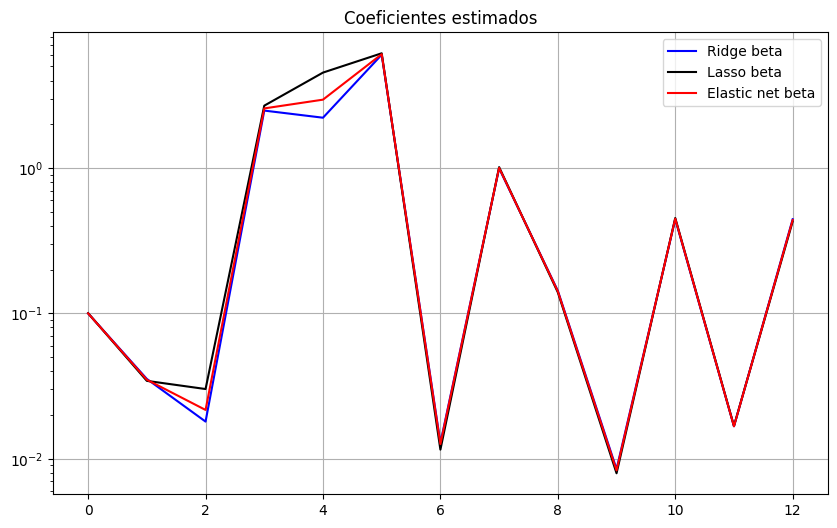

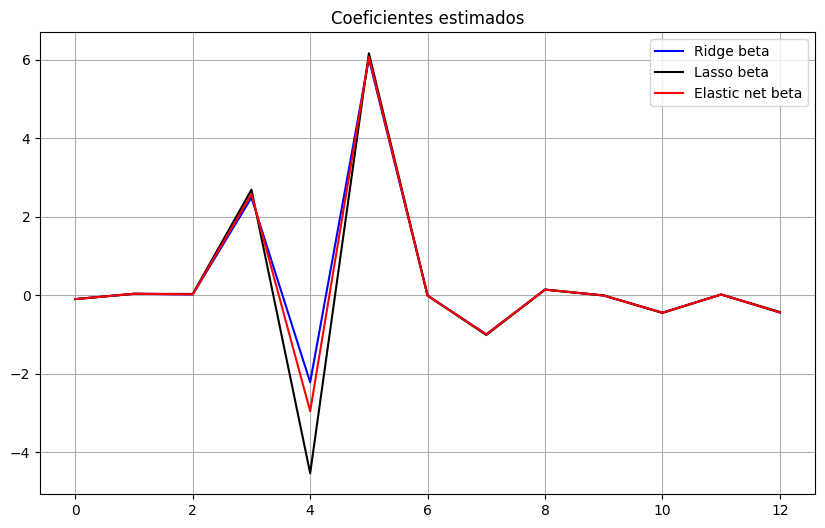

In [39]:
#Análisis de características/coeficientes estimados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_beta = ridge_regression_cvxpy(X_train, y_train, lambd=2)
lasso_beta = lasso_regression_cvxpy(X_train, y_train, lambd=2)
elastic_beta = elastic_net(X_train, y_train, lambd=2, alpha=0.5)


plt.figure(figsize=(10, 6))
plt.semilogy(np.abs(ridge_beta), label="Ridge beta", color="blue")
plt.semilogy(np.abs(lasso_beta), label="Lasso beta", color="black")
plt.semilogy(np.abs(elastic_beta), label="Elastic net beta", color="red")
plt.legend()
plt.title("Coeficientes estimados")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ridge_beta, label="Ridge beta", color="blue")
plt.plot(lasso_beta, label="Lasso beta", color="black")
plt.plot(elastic_beta, label="Elastic net beta", color="red")
plt.legend()
plt.title("Coeficientes estimados")
plt.grid()
plt.show()

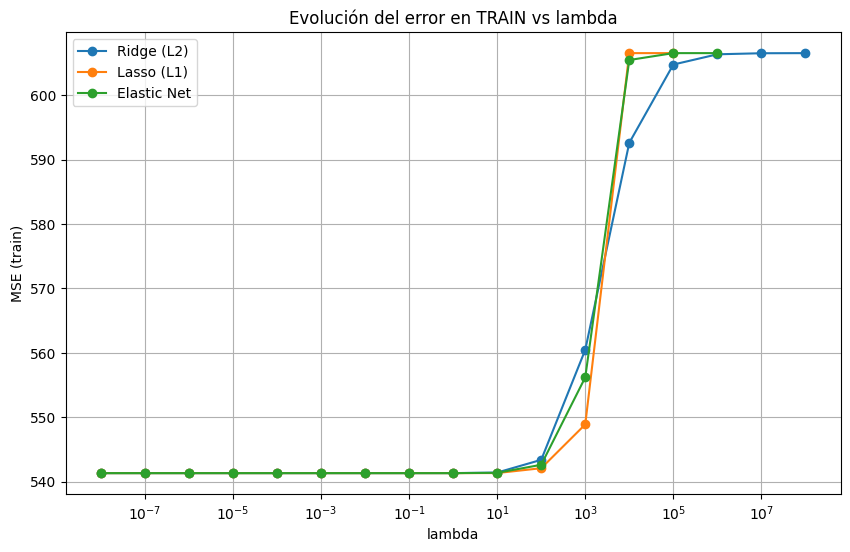

In [42]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Convertir a numpy float
Xtr = np.asarray(X_train, dtype=float)
ytr = np.asarray(y_train, dtype=float).ravel()

# (Muy recomendado) Estandarizar X para que L1/L2 tengan sentido y el solver no sufra
X_mean = Xtr.mean(axis=0)
X_std  = Xtr.std(axis=0) + 1e-12
Xtr_s  = (Xtr - X_mean) / X_std

lambdas = 10.0 ** np.arange(-8, 9)
alpha = 0.5

train_mse_ridge, train_mse_lasso, train_mse_enet = [], [], []

for lam in lambdas:
    # Ridge
    b_r = ridge_regression_cvxpy(Xtr_s, ytr, lambd=lam)
    y_pred_r = Xtr_s @ b_r
    train_mse_ridge.append(np.mean((ytr - y_pred_r) ** 2))

    # Lasso (puede fallar -> None)
    b_l = lasso_regression_cvxpy(Xtr_s, ytr, lambd=lam)
    if b_l is None:
        train_mse_lasso.append(np.nan)
    else:
        y_pred_l = Xtr_s @ b_l
        train_mse_lasso.append(np.mean((ytr - y_pred_l) ** 2))

    # Elastic Net (puede fallar -> None)
    b_e = elastic_net(Xtr_s, ytr, lambd=lam, alpha=alpha)
    if b_e is None:
        train_mse_enet.append(np.nan)
    else:
        y_pred_e = Xtr_s @ b_e
        train_mse_enet.append(np.mean((ytr - y_pred_e) ** 2))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_mse_ridge, marker="o", label="Ridge (L2)")
plt.plot(lambdas, train_mse_lasso, marker="o", label="Lasso (L1)")
plt.plot(lambdas, train_mse_enet,  marker="o", label="Elastic Net")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("MSE (train)")
plt.title("Evolución del error en TRAIN vs lambda")
plt.grid(True)
plt.legend()
plt.show()

#Se observa que cuando más grande es lambda más grande es el error
# Más λ → más regularización → menos flexibilidad
# Error sube porque el modelo subajusta

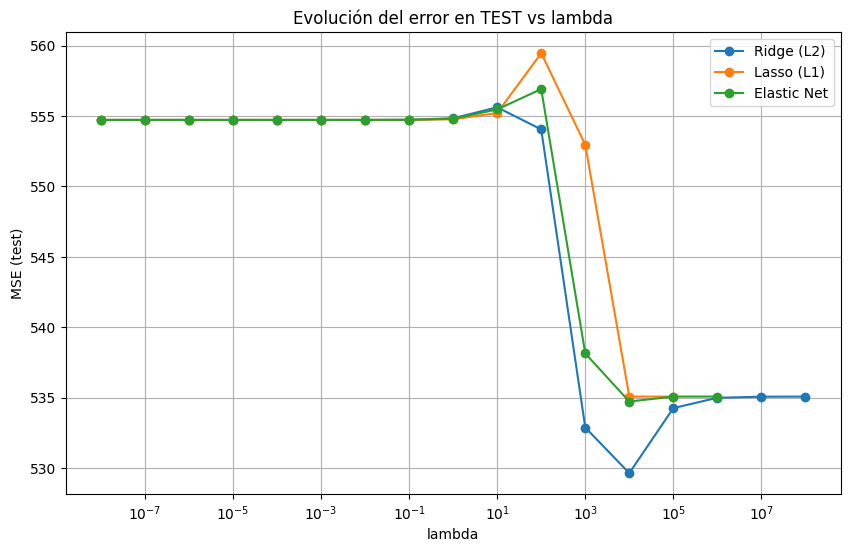

In [43]:
# Evolución del error en test en función de lambda


# Evolución del error en test en función de lambda (L1, L2 y Elastic Net)

import numpy as np
import matplotlib.pyplot as plt

# Convertir a numpy float
Xtr = np.asarray(X_train, dtype=float)
ytr = np.asarray(y_train, dtype=float).ravel()
Xte = np.asarray(X_test, dtype=float)
yte = np.asarray(y_test, dtype=float).ravel()

# Estandarizar usando SOLO train (muy importante)
X_mean = Xtr.mean(axis=0)
X_std  = Xtr.std(axis=0) + 1e-12
Xtr_s  = (Xtr - X_mean) / X_std
Xte_s  = (Xte - X_mean) / X_std

lambdas = 10.0 ** np.arange(-8, 9)  # 17 valores
alpha = 0.5

test_mse_ridge = []
test_mse_lasso = []
test_mse_enet  = []

for lam in lambdas:
    # Entrenar en TRAIN
    b_r = ridge_regression_cvxpy(Xtr_s, ytr, lambd=lam)
    b_l = lasso_regression_cvxpy(Xtr_s, ytr, lambd=lam)
    b_e = elastic_net(Xtr_s, ytr, lambd=lam, alpha=alpha)

    # Evaluar en TEST (si el solver falla -> NaN)
    y_pred_r = Xte_s @ b_r
    test_mse_ridge.append(np.mean((yte - y_pred_r) ** 2))

    if b_l is None:
        test_mse_lasso.append(np.nan)
    else:
        y_pred_l = Xte_s @ b_l
        test_mse_lasso.append(np.mean((yte - y_pred_l) ** 2))

    if b_e is None:
        test_mse_enet.append(np.nan)
    else:
        y_pred_e = Xte_s @ b_e
        test_mse_enet.append(np.mean((yte - y_pred_e) ** 2))

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(lambdas, test_mse_ridge, marker='o', label='Ridge (L2)')
plt.plot(lambdas, test_mse_lasso, marker='o', label='Lasso (L1)')
plt.plot(lambdas, test_mse_enet,  marker='o', label='Elastic Net')
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('MSE (test)')
plt.title('Evolución del error en TEST vs lambda')
plt.legend()
plt.grid(True)
plt.show()

# λ pequeño → overfitting

# λ medio → óptimo

# λ grande → underfitting

